# Linear regression

In [19]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from io import StringIO

male_100m = StringIO(r"""
1896,12
1900,11
1904,11
1906,11.2
1908,10.8
1912,10.8
1920,10.8
1924,10.6
1928,10.8
1932,10.3
1936,10.3
1948,10.3
1952,10.4
1956,10.5
1960,10.2
1964,10
1968,9.95
1972,10.14
1976,10.06
1980,10.25
1984,9.99
1988,9.92
1992,9.96
1996,9.84
2000,9.87
2004,9.85
2008,9.69
2012,9.63
"""
)

data = pd.read_csv(male_100m, index_col=0, header=None)
data.columns = ['time_s']
data.index.name = "year"

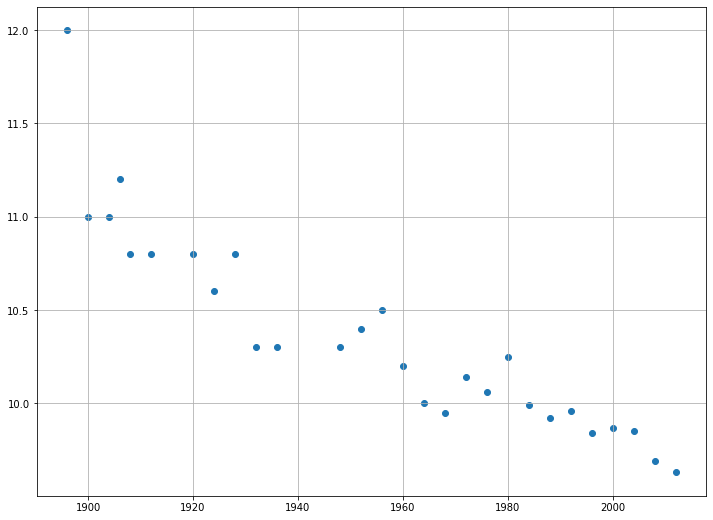

In [22]:
plt.figure(figsize=(12, 9))
plt.scatter(data.index, data.values)
plt.grid()

In [66]:
import numpy as np

out = np.polyfit(data.index, data.values, deg=1)

w1, w0 = np.array(out).squeeze()

In [67]:
w1, w0

(-0.013275323821781662, 36.309120409672246)

In [92]:
def estimate(x):
    y = np.array([[w0, w1]]) * np.polynomial.polynomial.polyvander(x, 1)
    return y.sum(axis=1)

In [93]:
estimate(data.index)


array([11.13910644, 11.08600515, 11.03290385, 11.00635321, 10.97980256,
       10.92670126, 10.82049867, 10.76739738, 10.71429608, 10.66119479,
       10.60809349, 10.4487896 , 10.39568831, 10.34258701, 10.28948572,
       10.23638442, 10.18328313, 10.13018183, 10.07708054, 10.02397924,
        9.97087795,  9.91777665,  9.86467536,  9.81157406,  9.75847277,
        9.70537147,  9.65227018,  9.59916888])

In [94]:
yhat = pd.Series(estimate(data.index), data.index)

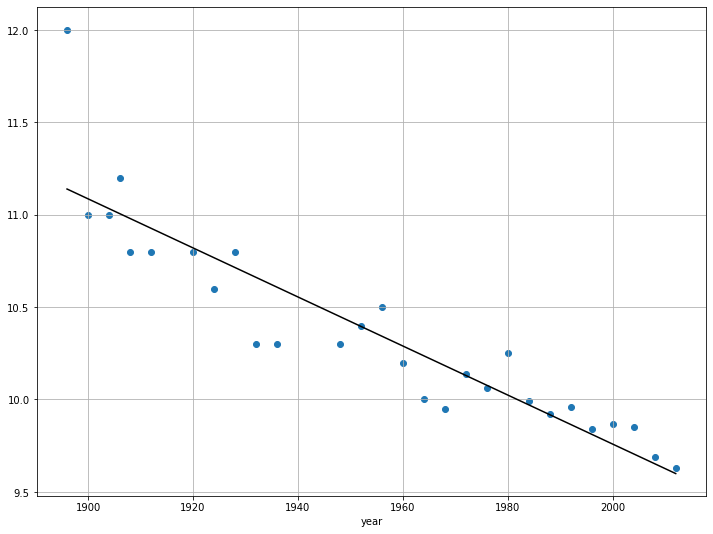

In [95]:
plt.figure(figsize=(12, 9))
plt.scatter(data.index, data.values)
yhat.plot(color='k')
plt.grid()

We know this will fail but try a polyfit with degree 2 anyway.

In [96]:
z2, z1, z0 = np.polyfit(data.index, data.values, deg=2)

In [99]:
np.hstack([z2, z1, z0])

array([ 9.44176566e-05, -3.82077920e-01,  3.96328576e+02])

In [110]:
def estimate2(x):
    wts = np.hstack(np.polyfit(data.index, data.values, deg=2))[::-1]
    y = wts * np.polynomial.polynomial.polyvander(x, deg=2)
    return y.sum(axis=1)

In [111]:
y2 = pd.Series(estimate2(data.index), data.index)

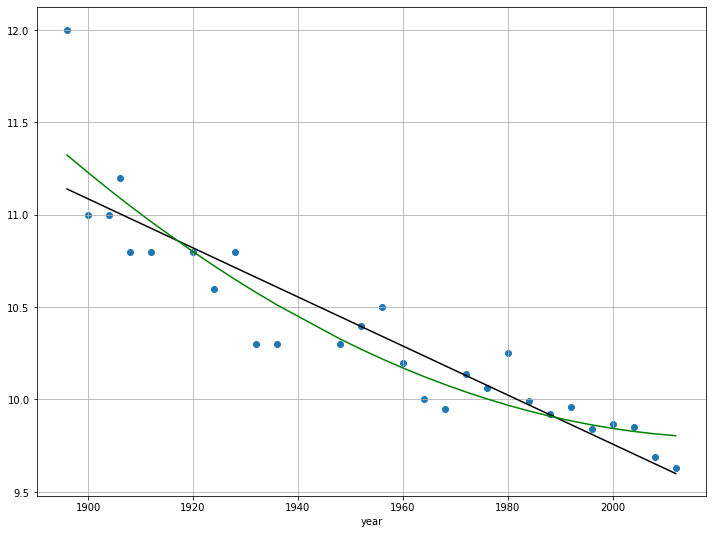

In [112]:
plt.figure(figsize=(12, 9))
plt.scatter(data.index, data.values)
yhat.plot(color='k')
y2.plot(color='g')
plt.grid()

In [256]:
def estimate_n(t, x, n):
    wts = np.hstack(np.polyfit(x, t, deg=n))[::-1]
    y = wts * np.polynomial.polynomial.polyvander(x, deg=n)
    est = y.sum(axis=1)
    N = x.size
    loss =  np.sum(np.square(t - est))/N
    return est, wts, loss

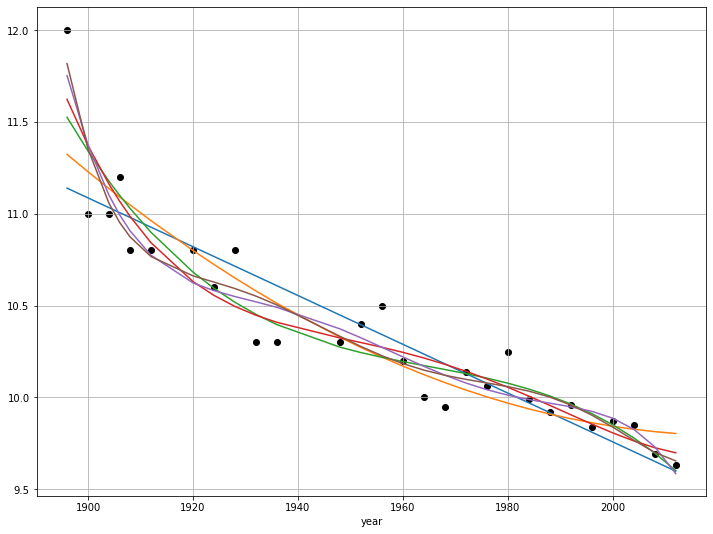

In [258]:
plt.figure(figsize=(12, 9))
plt.scatter(data.index, data.values, color='k')
for n in range(1, 7):
    out, _, _ = estimate_n(data.values.squeeze(), data.index, n)
    out = pd.Series(out, data.index)
    out.plot()
plt.grid()

## Validation / training split
Use only data before or in 1980 as the training set

In [282]:
training = data[data.index < 1980]
validation = data[data.index >= 1980]

$$L = \frac{1}{N}{(\mathbf{t - Xw})}^T(\mathbf{t - Xw})$$

In [283]:
t_training = training.values

In [284]:
X = np.vstack([np.ones(training.size), training.index]).T


In [285]:
X

array([[1.000e+00, 1.896e+03],
       [1.000e+00, 1.900e+03],
       [1.000e+00, 1.904e+03],
       [1.000e+00, 1.906e+03],
       [1.000e+00, 1.908e+03],
       [1.000e+00, 1.912e+03],
       [1.000e+00, 1.920e+03],
       [1.000e+00, 1.924e+03],
       [1.000e+00, 1.928e+03],
       [1.000e+00, 1.932e+03],
       [1.000e+00, 1.936e+03],
       [1.000e+00, 1.948e+03],
       [1.000e+00, 1.952e+03],
       [1.000e+00, 1.956e+03],
       [1.000e+00, 1.960e+03],
       [1.000e+00, 1.964e+03],
       [1.000e+00, 1.968e+03],
       [1.000e+00, 1.972e+03],
       [1.000e+00, 1.976e+03]])

In [286]:
w = np.hstack(np.polyfit(training.index, training.values.squeeze(), deg=1))[::-1]

In [287]:
w

array([ 4.24904002e+01, -1.64889724e-02])

In [288]:
N = training.size

In [289]:
loss = np.dot((t_training.squeeze() - np.dot(X, w)).T, (t_training.squeeze() - np.dot(X, w))) / N

In [290]:
t_training.squeeze() - np.dot(X, w)

array([ 0.77269149, -0.16135262, -0.09539673,  0.13758122, -0.22944084,
       -0.16348495, -0.03157317, -0.16561728,  0.10033861, -0.3337055 ,
       -0.26774961, -0.06988194,  0.09607395,  0.26202984,  0.02798573,
       -0.10605838, -0.09010249,  0.1658534 ,  0.15180929])

In [291]:
t_training.squeeze() - estimate_n(t_training.squeeze(), training.index, 1)[0]

array([ 0.77269149, -0.16135262, -0.09539673,  0.13758122, -0.22944084,
       -0.16348495, -0.03157317, -0.16561728,  0.10033861, -0.3337055 ,
       -0.26774961, -0.06988194,  0.09607395,  0.26202984,  0.02798573,
       -0.10605838, -0.09010249,  0.1658534 ,  0.15180929])

In [292]:
loss2 = np.sum(np.square(t_training.squeeze() - estimate_n(t_training.squeeze(), training.index, 1)[0]))/N

In [293]:
est, wts, lossn = estimate_n(t_training.squeeze(), training.index, 1)
lossn

0.05818453358036609

In [294]:
loss2

0.05818453358036609

Oops that was embarrassing...

Things to remember:

- Numpy broadcasting means that $X* w$ doesn't mean what you think- np.dot(X, w) is needed
- Order of arguments!
- Order of coefficients of polyfit

In [301]:
def validate(y, x, wts):
    # return loss function of weights applied to x and y
    vsize = x.size
    loss = np.sum(
        np.square(
            y -
            np.dot(
                np.polynomial.polynomial.polyvander(x, deg=wts.size-1),
                wts
            )
        )
    )
    return loss

In [302]:
results = {}
for order in range(1, 9):
    res = {}
    est, wts, loss = estimate_n(training.values.squeeze(), training.index, order)
    res['estimate'] = est
    res['weights'] = wts
    res['training loss'] = loss
    vsize = validation.index.size
    #vloss = np.sum(np.square(
    #    validation.values.squeeze() -   # t
    #    np.dot( 
    #        np.polynomial.polynomial.polyvander(validation.index.values, deg=order),  # X.
    #        wts                                                                  # w
    #    )
    #))
    vloss = validate(validation.values.squeeze(), validation.index, wts)
    res['validation loss'] = vloss
    results[order] = res

/home/mog/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/home/mog/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


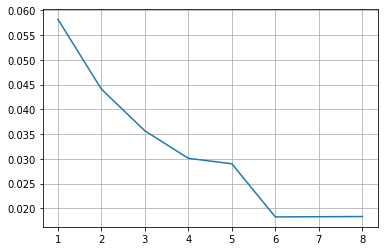

In [303]:
training_loss = pd.Series({n: results[n]['training loss'] for n in results.keys()})
training_loss.plot()
plt.grid()

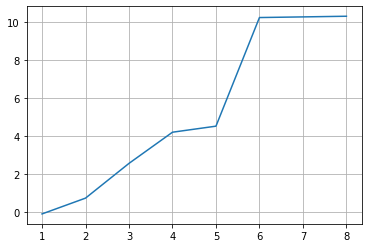

In [297]:
validation_loss = pd.Series({n: np.log(results[n]['validation loss']) for n in results.keys()})
validation_loss.plot()
plt.grid()

## Cross-validation

Split the data into K folds. Each block is used as validation for training set of the other K-1. 

Average over the K loss values. Taken to extremes, leave each item out and use as validation for the estimate based on training with every other point

In [308]:
total_loss = {}

for deg in range(1, 9):
    this_loss = []
    for item in data.index:
        this_training = data[data.index != item]
        this_validation = data[data.index==item]
        e, w, l = estimate_n(this_training.values.squeeze(), this_training.index, deg)
        this_l = validate(this_validation.values.squeeze(), this_validation.index, w)
        this_loss.append(this_l)
    total_loss[deg] = np.array(this_loss)

total_loss = pd.DataFrame(total_loss)
        

/home/mog/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  
/home/mog/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  
/home/mog/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  
/home/mog/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  
/home/mog/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  
/home/mog/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  
/home/mog/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  
/home/mog/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  
/home/mog/anacon

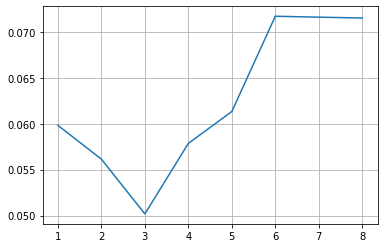

In [311]:
total_loss.mean(axis=0).plot()
plt.grid()

## Regularisation

$$L^\prime = L + \lambda \mathbf{w^T} \mathbf{w} $$

$$\hat{\mathbf{w}} = (\mathbf{X}^T\mathbf{X} + N\lambda \mathbf{I})^{-1}\mathbf{X}^T\mathbf{t}$$

In [341]:
def estimate_n(t, x, n):
    wts = np.hstack(np.polyfit(x, t, deg=n))[::-1]
    y = wts * np.polynomial.polynomial.polyvander(x, deg=n)
    est = y.sum(axis=1)
    N = x.size
    loss =  np.sum(np.square(t - est))/N
    return est, wts, loss

def estimate_reg_n(t, x, n, l):
    X = np.polynomial.polynomial.polyvander(x, deg=n)
    N = x.size
    wts = np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X) + N*l*np.identity(n+1)), X.T), t)
    est = np.dot(X, wts)
    loss = np.sum(np.square(t - est))/N
    return est, wts, loss
    

In [342]:
t = data.values.squeeze()
x = data.index

In [343]:
e, w, l = estimate_n(t, x, 1)

In [344]:
e2, w2, l2 = estimate_reg_n(t, x, 1, 0.1)

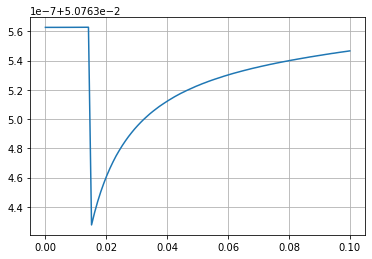

In [346]:
ll = np.linspace(0, 0.1, num=100)

results = {}

for l in ll:
    est, wts, loss = estimate_reg_n(t, x, 2, l)
    results[l] = loss
    
pd.Series(results).plot()
plt.grid()

In [329]:
w2

array([ 3.63091204e+01, -1.32753238e-02])

In [383]:

# now use einsum
t = data.values.squeeze()
x = data.index
N = x.size
n = 3
X = np.polynomial.polynomial.polyvander(x, deg=n)
N = x.size
l = 0.01
wts = np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X) + N*l*np.identity(n+1)), X.T), t)

print(wts)

[ 1.17389148e-11  1.52816241e-08  1.49230063e-05 -6.24353960e-09]


In [384]:
xtxninv = np.linalg.pinv(np.einsum('ij,jk->ik',X.T,X) + N*0.01*np.identity(n+1))

Matrix multiplication is associative

$$\mathbf{(AB)C} = \mathbf{A(BC)}$$

therefore we can einsum from left to right safely.

In [388]:
np.einsum('ij,jk,k->i', xtxninv, X.T, t)

array([ 1.17389148e-11,  1.52816241e-08,  1.49230063e-05, -6.24353960e-09])